#Определение концентрации примеси в InAs методом вольт-фарадного профилирования с использованием электролитичечкого контакта

* сложно сделать выпрямляющий контакт металл/InAs
* электрлит позволяет содать выпрямляющий контакт
* измерение сильнолегированных образцов дает адеквытные значения концентрации
* При измереннии слаболегированых образцов мы получаем завышенные значение. Причина этого рассмотренна в предыдущей статье
* Эта статья нарпявленна на преодаление ограниченний непозволяющих получить обедение в слаболегированнй образцах

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Ellipse
import ecvproc
import admproc
from scipy.signal import butter, lfilter
from scipy.optimize import curve_fit
%run -i settings.py

In [2]:
model1 = np.genfromtxt('./data/cap_volt_1e15_noinv.dat',
                      names=['vv', 'cc'])
model2 = np.genfromtxt('./data/cap_volt_1e+15.dat',
                      names=['vv', 'cc'])

# linear fit
cap_fit, volt_fit, dop = ecvproc.lin_fit(model1['cc'], model1['vv'],
                                   vmin=0.1, vmax=0.2,
                                   eps=15.5)

# freq = 300 Hz, w/o acc
data1 = np.genfromtxt('./data/InAS-1-05-31_pxi_9.dat',
                     names=['vv','cp','v2','cs','v3','diss'])

# freq = 300 Hz, acc 0.6V
# C-V in this file have good argiment with model
data2 = np.genfromtxt('./data/InAS-1-05-31_pxi_26.dat',
                     names=['vv','cp','v2','cs','v3','diss'])

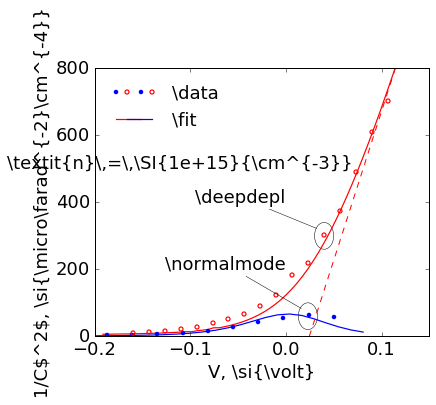

In [12]:
fig = plt.figure()
cv = fig.add_subplot(111)
m1, = cv.plot(model1['vv'], 1/model1['cc']**2, 'r-', lw=1.2)
m2, = cv.plot(model2['vv'], 1/model2['cc']**2, 'b-', lw=1.2)

fit, = cv.plot(volt_fit, cap_fit, 'r--', lw=1)
d1, = cv.plot(data1['vv']+0.15, 1/data1['cp']**2, 'b.',
        ms=9, markeredgecolor='none')
d2, = cv.plot(data2['vv'][:-2]+0.19, 1/data2['cp'][:-2]**2, 'ro',
        ms=4, mfc='none', mec='r', mew=1.2)

#cv.yaxis.set_major_locator(ticker.MultipleLocator(100))

cv.set_xlabel('V, \si{\\volt}')
cv.set_ylabel('1/C\$^2$, \si{\micro\\farad^{-2}\cm^{-4}}')

cv.set_ylim(0, 800)
cv.set_xlim(-0.2, 0.15)
cv.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
cv.yaxis.set_major_locator(ticker.MultipleLocator(200))

if dop > 0:
    type = '\\textit{p}'
else:
    type = '\\textit{n}'
cv.text(0.07, 500, type+'\,=\,\SI{'+'{:.2g}'.format(abs(dop))+'}{\cm^{-3}}',
        ha="right")

el_1 = Ellipse((0.04,300), 0.02, 80, fill=False, lw=0.5)
el_2 = Ellipse((0.023,60), 0.02, 80, fill=False, lw=0.5)
cv.add_artist(el_1)
cv.add_artist(el_2)

cv.annotate('\\deepdepl', (0.034, 320), (0.0, 400),
            arrowprops=dict(arrowstyle="-", lw=0.5), 
            horizontalalignment='right')

cv.annotate('\\normalmode', (0.018, 80), (0.0, 200),
            arrowprops=dict(arrowstyle="-",lw=0.5),
            horizontalalignment='right')

plt.legend((d1,m1,d2,m2), ('','','\\data','\\fit'), 
          loc='upper left', frameon=False, numpoints=2,
          ncol = 2, columnspacing=-2.2)

plt.savefig('IP_InAs_deep_CV_.svg')
plt.show()

# По мере роста анодного слоя на поверхности InAs CV, измеренная при помощи PXI, начинает изменяться. 

* __Следует проверить повторяемость этих результатов __
* При измерении с использование PXI напряжение подается имплульсно
* Какая должна быть толщина окисла
* Как определить тощину окила? АСМ?

In [4]:
d = np.genfromtxt('./data/InAs_4_1_cap_relax.dat',
                    names=['time', 'cap'])

def r_fit(t, t_m, a, c):
    return a*np.exp(-t/t_m) + c

t = np.linspace(0,4,50)
popt, pcov  = curve_fit(r_fit, d['time'], d['cap'])
print(popt)

[ 1.51035591 -0.1418522   0.31515147]


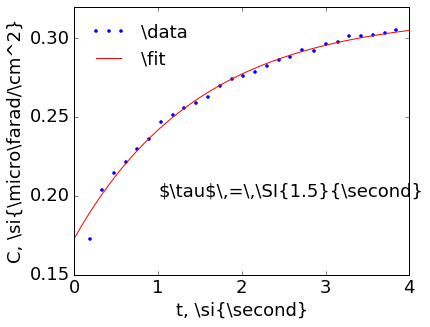

In [6]:
fig = plt.figure()
ct = fig.add_subplot(111)
ct.plot(d['time'][::3], d['cap'][::3], 'b.', label='\\data')
ct.plot(t, r_fit(t, *popt), 'r', label='\\fit')

ct.set_ylim(0.15,0.32)
ct.xaxis.set_major_locator(ticker.MultipleLocator(1))
ct.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

ct.set_xlabel('t, \\si{\\second}')
ct.set_ylabel('C, \si{\micro\\farad/\cm^2}')

ct.text(1, 0.2, '\$\\tau$'+'\,=\,\SI{'+'{:.2g}'.format(popt[0])+'}{\\second}',
        ha="left")

ct.legend(loc='upper left', numpoints=3, frameon=False)
plt.savefig('IP_InAs_relax.svg')
plt.show()